https://www.acmicpc.net/problem/16918

## 문제
봄버맨은 크기가 R×C인 직사각형 격자판 위에서 살고 있다. 격자의 각 칸은 비어있거나 폭탄이 들어있다.

폭탄이 있는 칸은 3초가 지난 후에 폭발하고, 폭탄이 폭발한 이후에는 폭탄이 있던 칸이 파괴되어 빈 칸이 되며, 인접한 네 칸도 함께 파괴된다. 즉, 폭탄이 있던 칸이 (i, j)인 경우에 (i+1, j), (i-1, j), (i, j+1), (i, j-1)도 함께 파괴된다. 만약, 폭탄이 폭발했을 때, 인접한 칸에 폭탄이 있는 경우에는 인접한 폭탄은 폭발 없이 파괴된다. 따라서, 연쇄 반응은 없다.

봄버맨은 폭탄에 면역력을 가지고 있어서, 격자판의 모든 칸을 자유롭게 이동할 수 있다. 봄버맨은 다음과 같이 행동한다.

가장 처음에 봄버맨은 일부 칸에 폭탄을 설치해 놓는다. 모든 폭탄이 설치된 시간은 같다.
다음 1초 동안 봄버맨은 아무것도 하지 않는다.
다음 1초 동안 폭탄이 설치되어 있지 않은 모든 칸에 폭탄을 설치한다. 즉, 모든 칸은 폭탄을 가지고 있게 된다. 폭탄은 모두 동시에 설치했다고 가정한다.
1초가 지난 후에 3초 전에 설치된 폭탄이 모두 폭발한다.
3과 4를 반복한다.
폭탄을 설치해놓은 초기 상태가 주어졌을 때, N초가 흐른 후의 격자판 상태를 구하려고 한다.

예를 들어, 초기 상태가 아래와 같은 경우를 보자.
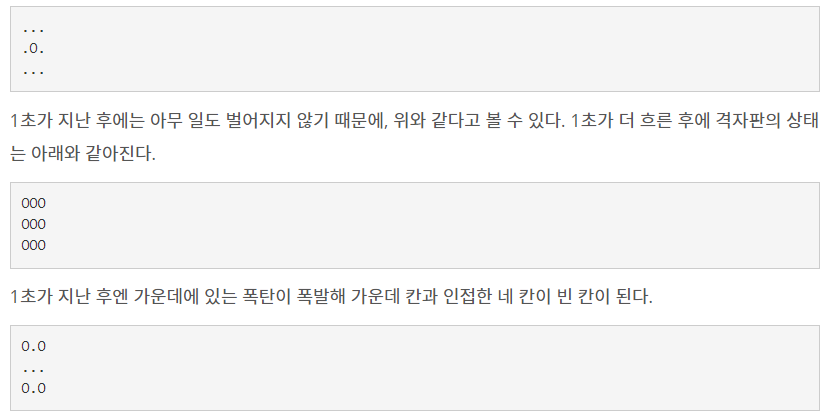

## 입력
첫째 줄에 R, C, N (1 ≤ R, C, N ≤ 200)이 주어진다. 둘째 줄부터 R개의 줄에 격자판의 초기 상태가 주어진다. 빈 칸은 '.'로, 폭탄은 'O'로 주어진다.

## 출력
총 R개의 줄에 N초가 지난 후의 격자판 상태를 출력한다.

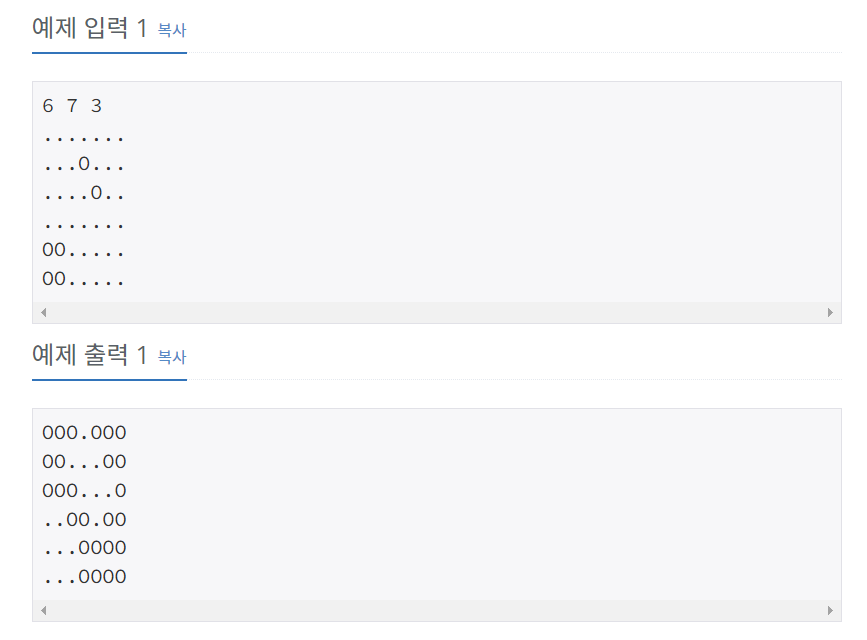

In [ ]:
.......
...O...
....O..
.......
OO.....
OO.....

<초기 상태, 1초 후>

OOOOOOO
OOOOOOO
OOOOOOO
OOOOOOO
OOOOOOO
OOOOOOO

<2초 후>

OOO.OOO
OO...OO
OOO...O
..OO.OO
...OOOO
...OOOO

<3초 후>

OOOOOOO
OOOOOOO
OOOOOOO
OOOOOOO
OOOOOOO
OOOOOOO

<4초 후>

.......
...O...
....O..
.......
OO.....
OO.....

<5초 후>

In [ ]:
r, c, n = map(int, input().split())

In [ ]:
board = [list(str(input())) for _ in range(r)] 

In [ ]:
from collections import deque
bombs = deque()

In [ ]:
def find_bombs(): # bombs 위치 찾기
    for i in range(r):
        for j in range(c):
            if board[i][j] == 'O':
                bombs.append((i,j))

In [ ]:
def bomb(): # 폭탄 터트리기
    while bombs:
        i, j = bombs.popleft()
        board[i][j] = '.'
        if i+1 < r:
            after_bombed[i+1][j] = '.'
        if i-1 >= 0:
            after_bombed[i-1][j] = '.'
        if j+1 < c:
            after_bombed[i][j+1] = '.'
        if j-1 >= 0:
            after_bombed[i][j-1] = '.'

제출코드 - 틀림 (왜...)

In [ ]:
r, c, n = map(int, input().split())
after_bombed = [['O'] * c for _ in range(r)] # 모두 'O' 인 격자판
before_bombed = [list(str(input())) for _ in range(r)] # 초기 격자판 입력 저장

if n == 1: # 초기 격자판
    for row in before_bombed:
        print(''.join(row))
        
if n % 2 == 0: # n이 짝수인 경우는 모두 'O' 인 격자판 출력
    for row in after_bombed:
        print(''.join(row))
else:

    for i, row in enumerate(before_bombed): # n % 4 == 3 인 경우
        for j, v in enumerate(row):
            if v == 'O':
                after_bombed[i][j] = '.'
                if i+1 < r:
                    after_bombed[i+1][j] = '.'
                if i-1 >= 0:
                    after_bombed[i-1][j] = '.'
                if j+1 < c:
                    after_bombed[i][j+1] = '.'
                if j-1 >= 0:
                    after_bombed[i][j-1] = '.'
    
    before_bombed = [['O'] * c for _ in range(r)] # 모두 'O' 인 격자판
    for i, row in enumerate(after_bombed): # n % 4 == 1 인 경우
        for j, v in enumerate(row):
            if v == 'O':
                before_bombed[i][j] = '.'
                if i+1 < r:
                    before_bombed[i+1][j] = '.'
                if i-1 >= 0:
                    before_bombed[i-1][j] = '.'
                if j+1 < c:
                    before_bombed[i][j+1] = '.'
                if j-1 >= 0:
                    before_bombed[i][j-1] = '.'


    if n % 4 == 1: 
        for row in before_bombed:
            print(''.join(row))
    elif n % 4 == 3:
        for row in after_bombed:
            print(''.join(row))

제출코드

In [ ]:
r, c, n = map(int, input().split())
board = [list(str(input())) for _ in range(r)]

from collections import deque
bombs = deque()

def find_bombs(): # bombs 위치 찾기
    for i in range(r):
        for j in range(c):
            if board[i][j] == 'O':
                bombs.append((i,j))
                
def bomb(): # 폭탄 터트리기
    while bombs:
        i, j = bombs.popleft()
        board[i][j] = '.'
        if i+1 < r:
            board[i+1][j] = '.'
        if i-1 >= 0:
            board[i-1][j] = '.'
        if j+1 < c:
            board[i][j+1] = '.'
        if j-1 >= 0:
            board[i][j-1] = '.'

n -= 1 # 1초엔 아무것도 안함

while n:
    find_bombs()
    board = [['O'] * c for _ in range(r)] # 모두 'O' 인 격자판
    n -= 1
    if n == 0:
        break
    
    bomb()
    n -= 1
    
for row in board:
    print(''.join(row))